In [2]:
#Step 1 : Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector    
import sqlalchemy         

In [16]:
# Step 2: Load the Dataset

df=pd.read_csv("ICRISAT-District Level Data - ICRISAT-District Level Data.csv")

In [9]:
# Step 3: Exploring the dataset

print(df.shape)      # number of rows and columns

(16146, 80)


In [10]:
print(df.columns)    # list of all column names

Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 tons)', 'BARLEY 

In [11]:
print(df.head())     # first 5 rows

   Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  1966          14  Chhattisgarh      Durg                548.0   
1          1  1967          14  Chhattisgarh      Durg                547.0   
2          1  1968          14  Chhattisgarh      Durg                556.3   
3          1  1969          14  Chhattisgarh      Durg                563.4   
4          1  1970          14  Chhattisgarh      Durg                571.6   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                        185.0                  337.59                  44.0   
1                        409.0                  747.71                  50.0   
2                        468.0                  841.27                  53.7   
3                        400.8                  711.40                  49.4   
4                        473.6                  828.55                  44.2   

   WHEAT PRODUCTION (1000 tons)  ...  SUGARC

In [12]:
print(df.info())     # data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [19]:
#DATA CLEANING

# Rename columns (remove spaces, make lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Handle missing values
df = df.fillna(0)  # Replace NaN with 0 (or use mean if required)

# Check for duplicates
df = df.drop_duplicates()

print("Cleaned dataset shape:", df.shape)
df.to_csv("ICRISAT_District_Cleaned.csv", index=False)


Cleaned dataset shape: (16146, 80)


In [22]:
print(df.columns.tolist())

['dist_code', 'year', 'state_code', 'state_name', 'dist_name', 'rice_area_(1000_ha)', 'rice_production_(1000_tons)', 'rice_yield_(kg_per_ha)', 'wheat_area_(1000_ha)', 'wheat_production_(1000_tons)', 'wheat_yield_(kg_per_ha)', 'kharif_sorghum_area_(1000_ha)', 'kharif_sorghum_production_(1000_tons)', 'kharif_sorghum_yield_(kg_per_ha)', 'rabi_sorghum_area_(1000_ha)', 'rabi_sorghum_production_(1000_tons)', 'rabi_sorghum_yield_(kg_per_ha)', 'sorghum_area_(1000_ha)', 'sorghum_production_(1000_tons)', 'sorghum_yield_(kg_per_ha)', 'pearl_millet_area_(1000_ha)', 'pearl_millet_production_(1000_tons)', 'pearl_millet_yield_(kg_per_ha)', 'maize_area_(1000_ha)', 'maize_production_(1000_tons)', 'maize_yield_(kg_per_ha)', 'finger_millet_area_(1000_ha)', 'finger_millet_production_(1000_tons)', 'finger_millet_yield_(kg_per_ha)', 'barley_area_(1000_ha)', 'barley_production_(1000_tons)', 'barley_yield_(kg_per_ha)', 'chickpea_area_(1000_ha)', 'chickpea_production_(1000_tons)', 'chickpea_yield_(kg_per_ha)',

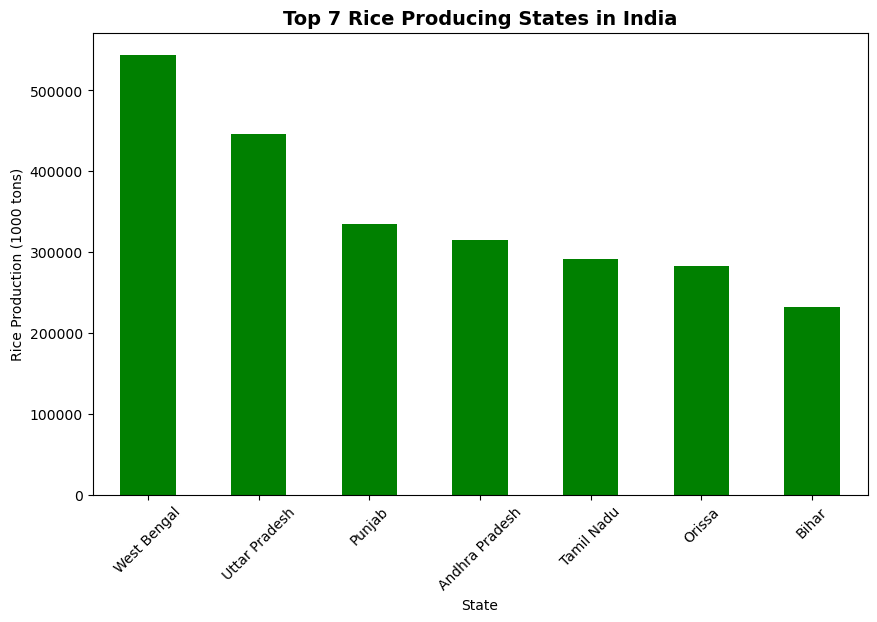

In [24]:
# 1.Top 7 Rice Producing States

top_7_rice_state = (
    df.groupby("state_name")["rice_production_(1000_tons)"]
    .sum()
    .sort_values(ascending=False)
    .head(7)
)

plt.figure(figsize=(10,6))
top_7_rice_state.plot(kind="bar", color="green")

plt.title("Top 7 Rice Producing States in India", fontsize=14, weight="bold")
plt.xlabel("State")
plt.ylabel("Rice Production (1000 tons)")
plt.xticks(rotation=45)
plt.show()

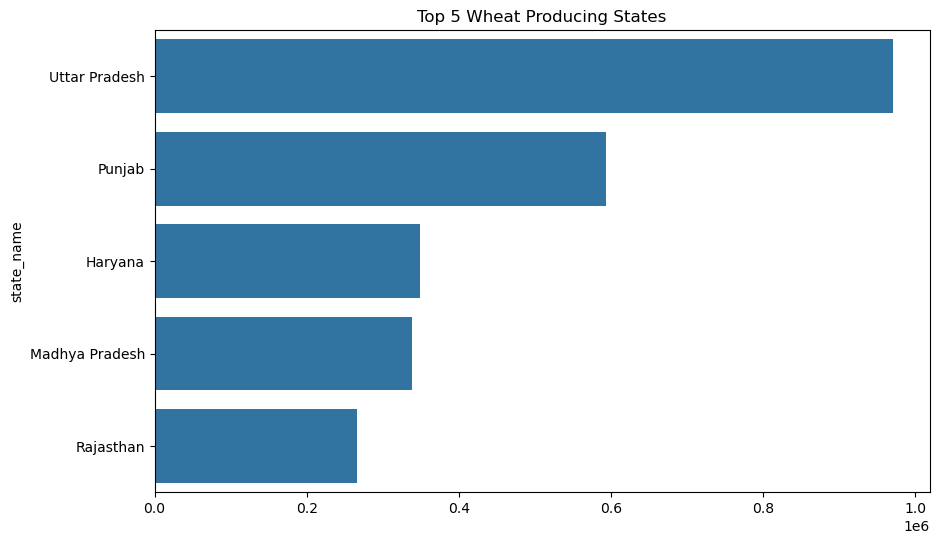

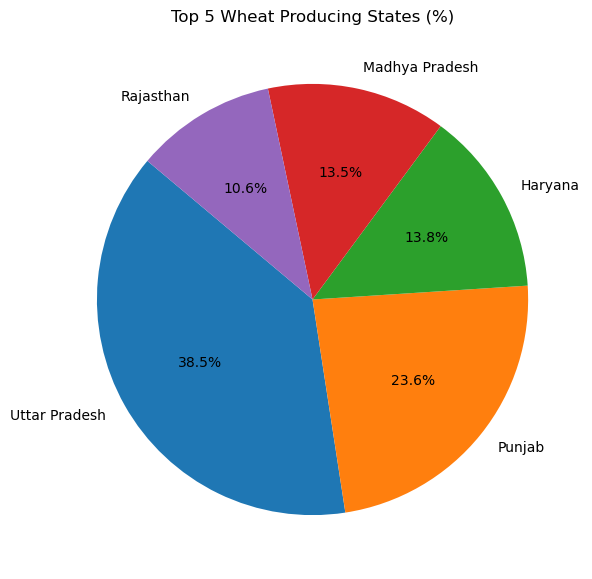

In [27]:
# 2. Top 5 Wheat Producing States (Bar + Pie) 

wheat_states = df.groupby("state_name")["wheat_production_(1000_tons)"].sum().nlargest(5)

# Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(x=wheat_states.values, y=wheat_states.index)
plt.title("Top 5 Wheat Producing States")
plt.show()

# Pie Chart
plt.figure(figsize=(7,7))
plt.pie(wheat_states.values, labels=wheat_states.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 5 Wheat Producing States (%)")
plt.show()

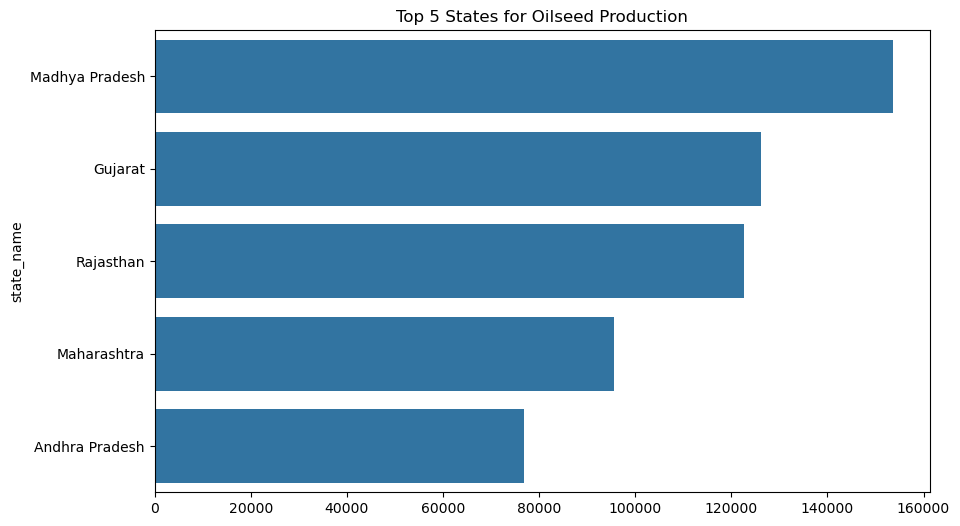

In [29]:
# 3. Oilseed Production by Top 5 States

oil_states = df.groupby("state_name")["oilseeds_production_(1000_tons)"].sum().nlargest(5)
plt.figure(figsize=(10,6))
sns.barplot(x=oil_states.values, y=oil_states.index)
plt.title("Top 5 States for Oilseed Production")
plt.show()

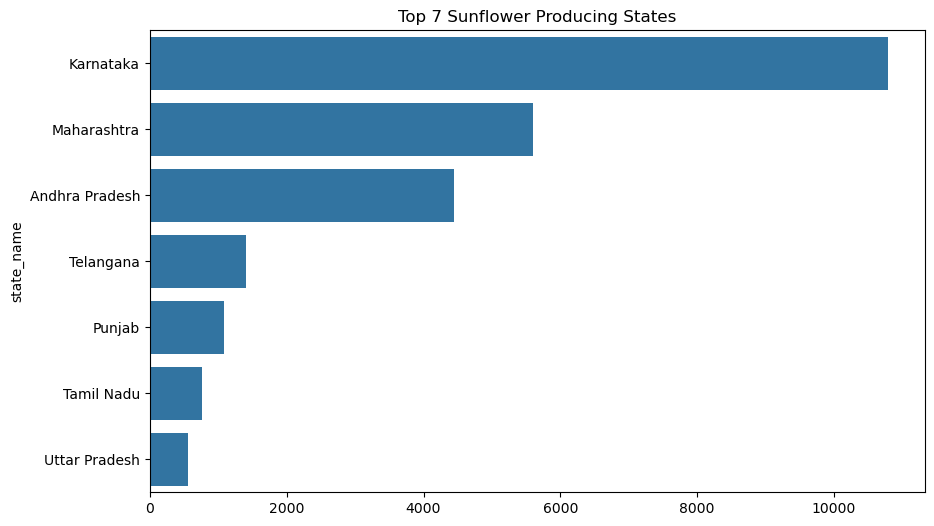

In [31]:
# 4. Top 7 Sunflower Producing States

sun_states = df.groupby("state_name")["sunflower_production_(1000_tons)"].sum().nlargest(7)
plt.figure(figsize=(10,6))
sns.barplot(x=sun_states.values, y=sun_states.index)
plt.title("Top 7 Sunflower Producing States")
plt.show()

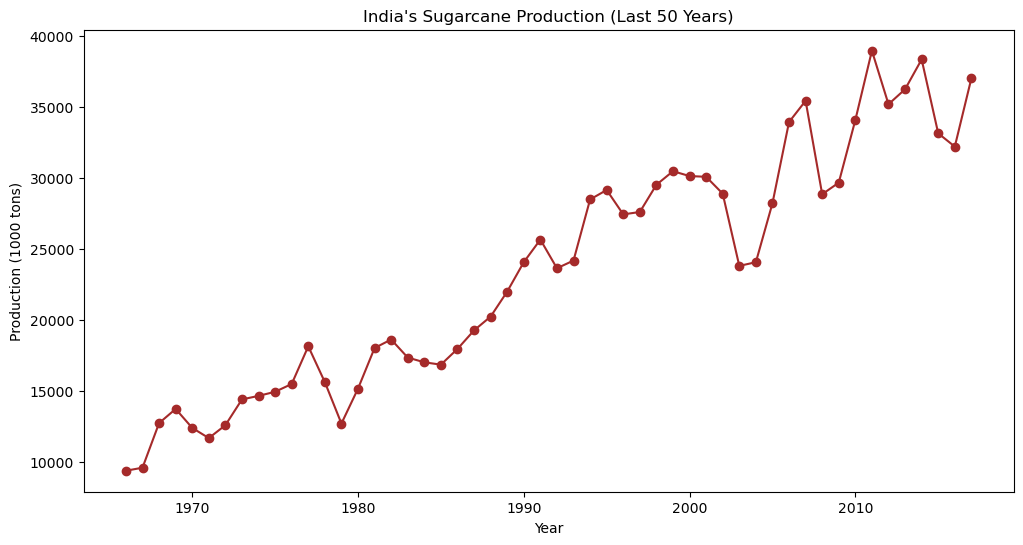

In [32]:
# 5. Sugarcane Production (50 Years)

sugar_trend = df.groupby("year")["sugarcane_production_(1000_tons)"].sum()
plt.figure(figsize=(12,6))
plt.plot(sugar_trend.index, sugar_trend.values, marker="o", color="brown")
plt.title("India's Sugarcane Production (Last 50 Years)")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.show()

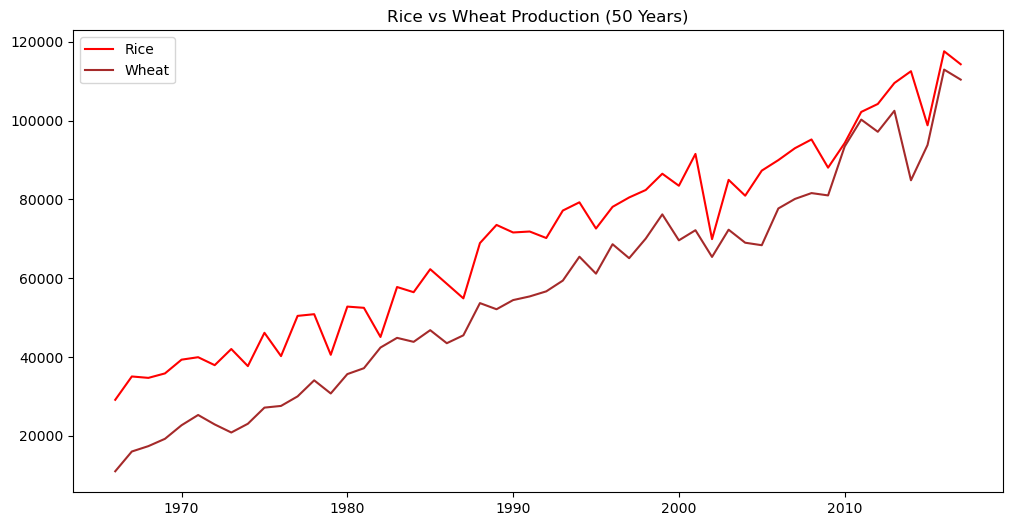

In [34]:
# 6.Rice vs Wheat Production (50 Years)

prod_trend = df.groupby("year")[["rice_production_(1000_tons)","wheat_production_(1000_tons)"]].sum()
plt.figure(figsize=(12,6))
plt.plot(prod_trend.index, prod_trend["rice_production_(1000_tons)"], label="Rice", color="red")
plt.plot(prod_trend.index, prod_trend["wheat_production_(1000_tons)"], label="Wheat", color="brown")
plt.title("Rice vs Wheat Production (50 Years)")
plt.legend()
plt.show()

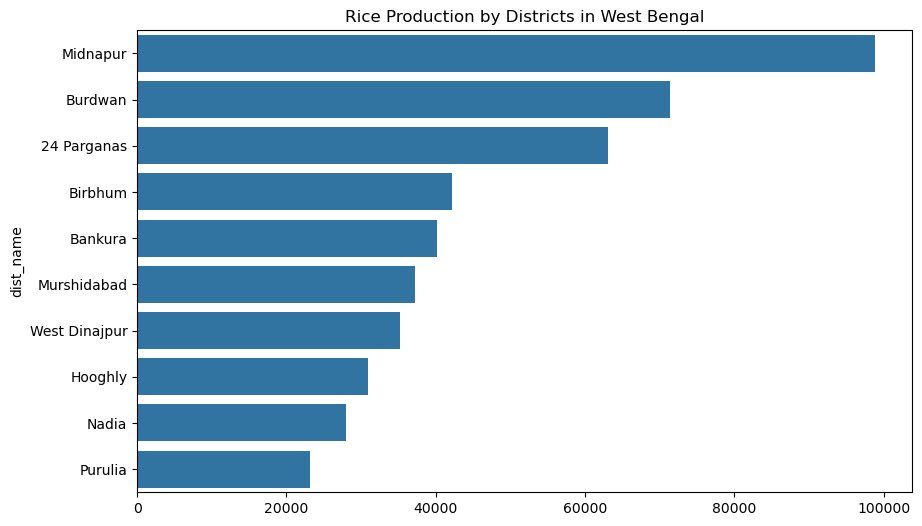

In [35]:
# 7.Rice Production by West Bengal Districts

wb_rice = df[df["state_name"]=="West Bengal"].groupby("dist_name")["rice_production_(1000_tons)"].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=wb_rice.values, y=wb_rice.index)
plt.title("Rice Production by Districts in West Bengal")
plt.show()

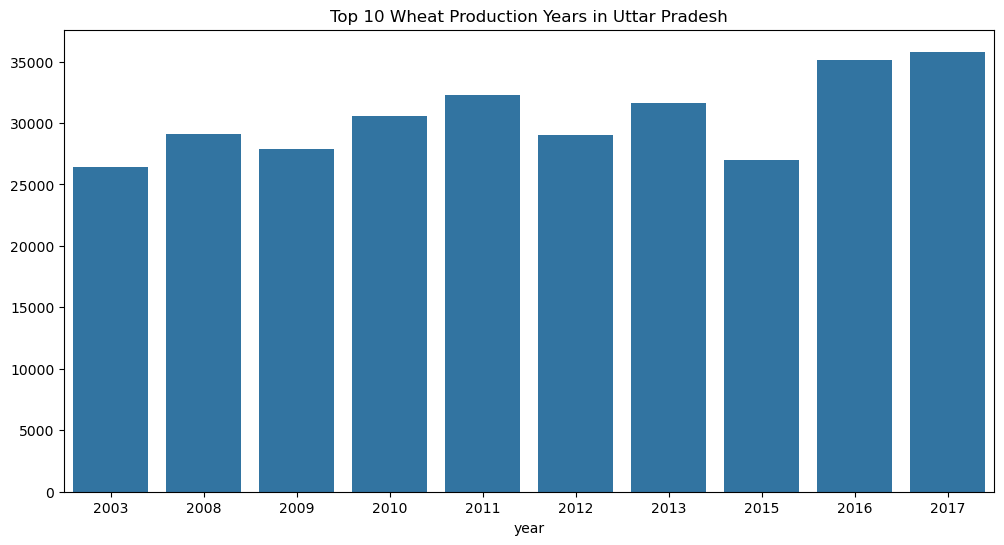

In [36]:
# 8.Top 10 Wheat Production Years (UP)

up_wheat = df[df["state_name"]=="Uttar Pradesh"].groupby("year")["wheat_production_(1000_tons)"].sum().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=up_wheat.index, y=up_wheat.values)
plt.title("Top 10 Wheat Production Years in Uttar Pradesh")
plt.show()

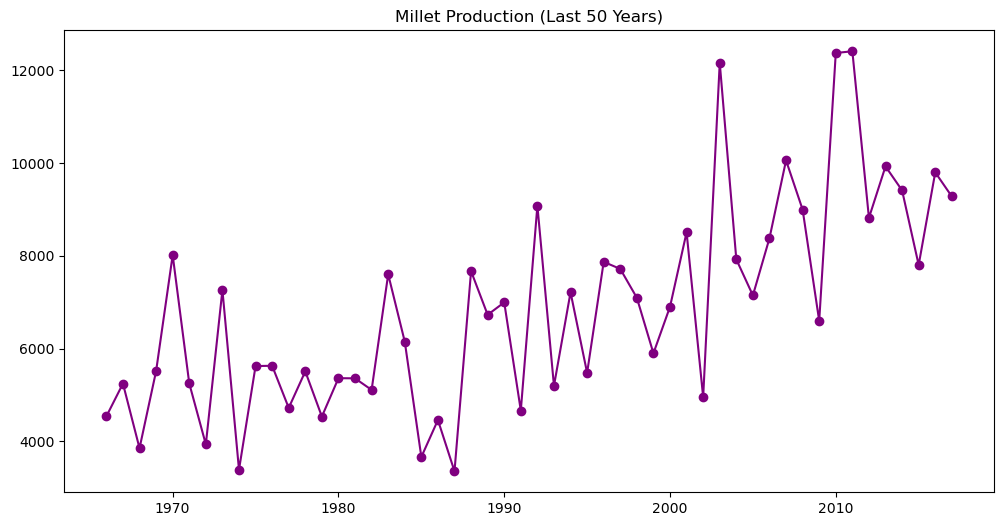

In [37]:
# 9. Millet Production (50 Years)

millet_trend = df.groupby("year")["pearl_millet_production_(1000_tons)"].sum()
plt.figure(figsize=(12,6))
plt.plot(millet_trend.index, millet_trend.values, marker="o", color="purple")
plt.title("Millet Production (Last 50 Years)")
plt.show()

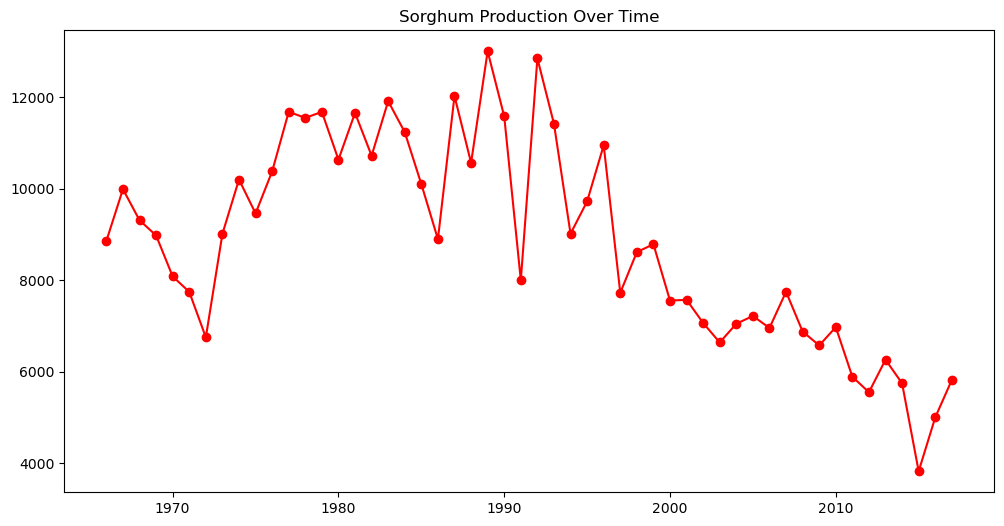

In [38]:
# 10. Sorghum Production

sorghum_trend = df.groupby("year")["sorghum_production_(1000_tons)"].sum()
plt.figure(figsize=(12,6))
plt.plot(sorghum_trend.index, sorghum_trend.values, marker="o", color="red")
plt.title("Sorghum Production Over Time")
plt.show()

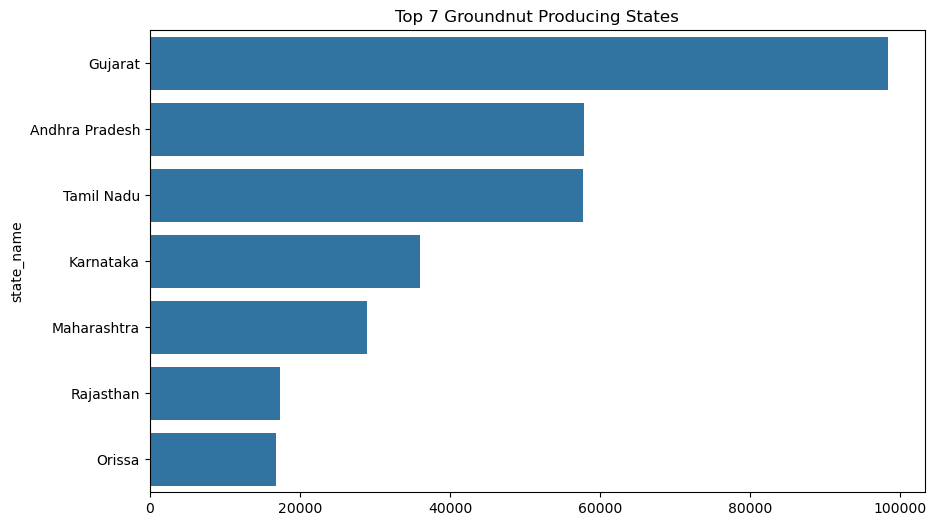

In [39]:
# 11. Groundnut Production (Top 7 States)

ground_states = df.groupby("state_name")["groundnut_production_(1000_tons)"].sum().nlargest(7)
plt.figure(figsize=(10,6))
sns.barplot(x=ground_states.values, y=ground_states.index)
plt.title("Top 7 Groundnut Producing States")
plt.show()

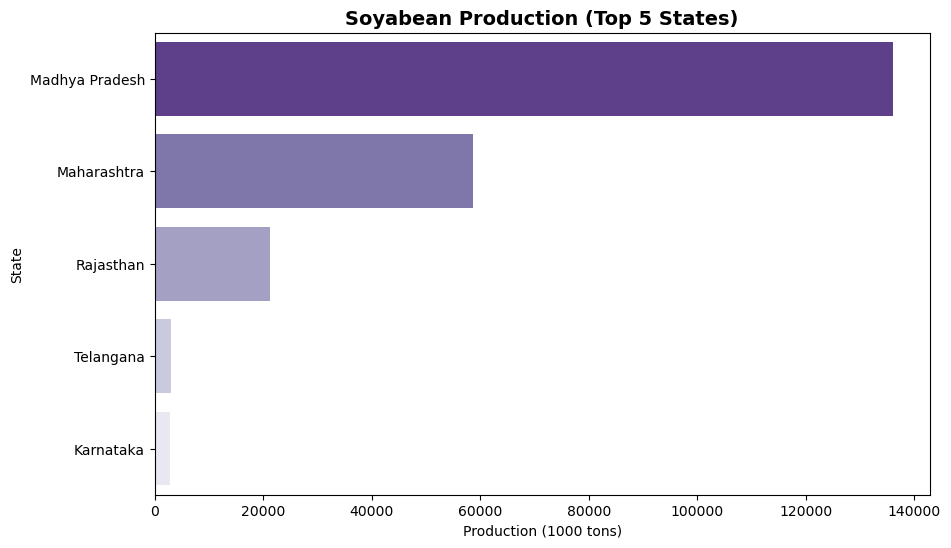

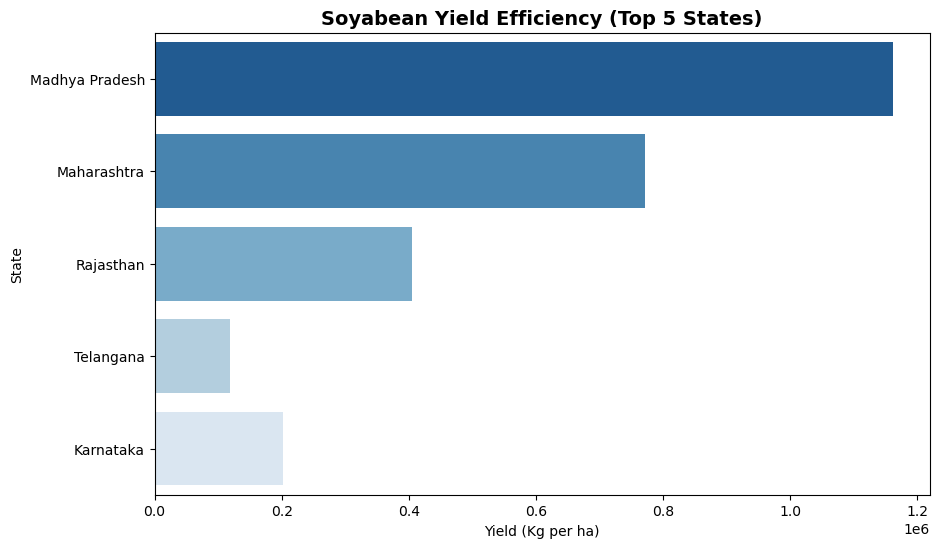

In [43]:
# 12. Soybean Production & Yield

# Group and select top 5 states
soy_states = (
    df.groupby("state_name")[["soyabean_production_(1000_tons)", "soyabean_yield_(kg_per_ha)"]]
    .sum()
    .nlargest(5, "soyabean_production_(1000_tons)")
    .reset_index()
)

# --- Production Bar Chart ---
plt.figure(figsize=(10,6))
sns.barplot(
    data=soy_states,
    x="soyabean_production_(1000_tons)", 
    y="state_name",
    hue="state_name",           
    dodge=False,
    palette="Purples_r",
    legend=False
)
plt.title("Soyabean Production (Top 5 States)", fontsize=14, weight="bold")
plt.xlabel("Production (1000 tons)")
plt.ylabel("State")
plt.show()

# --- Yield Efficiency Bar Chart ---
plt.figure(figsize=(10,6))
sns.barplot(
    data=soy_states,
    x="soyabean_yield_(kg_per_ha)", 
    y="state_name",
    hue="state_name",
    dodge=False,
    palette="Blues_r",
    legend=False
)
plt.title("Soyabean Yield Efficiency (Top 5 States)", fontsize=14, weight="bold")
plt.xlabel("Yield (Kg per ha)")
plt.ylabel("State")
plt.show()

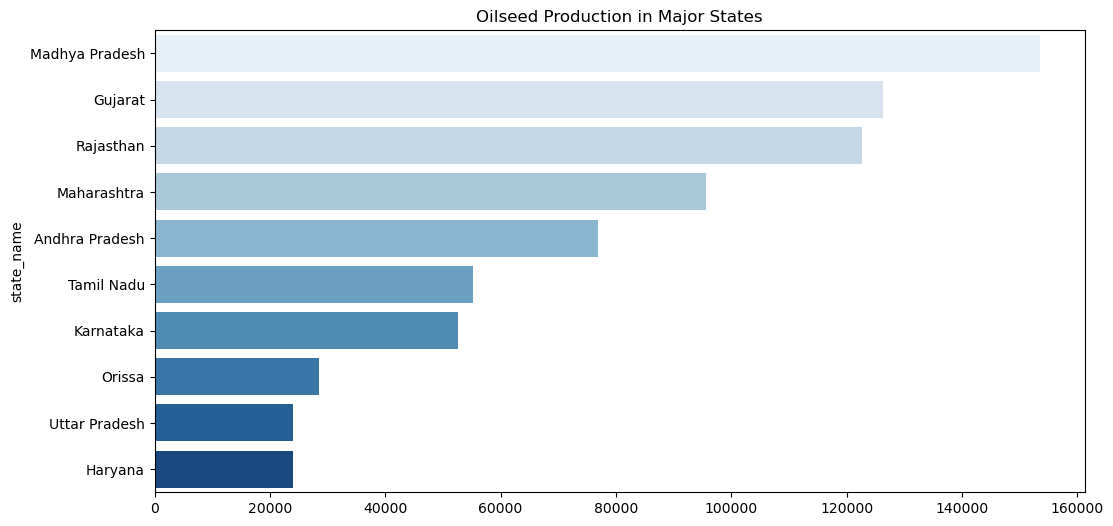

In [47]:
# 13. Oilseed Production in Major States

oil_major = df.groupby("state_name")["oilseeds_production_(1000_tons)"].sum().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=oil_major.values, y=oil_major.index,  hue=oil_major.index,palette="Blues")
plt.title("Oilseed Production in Major States")
plt.show()


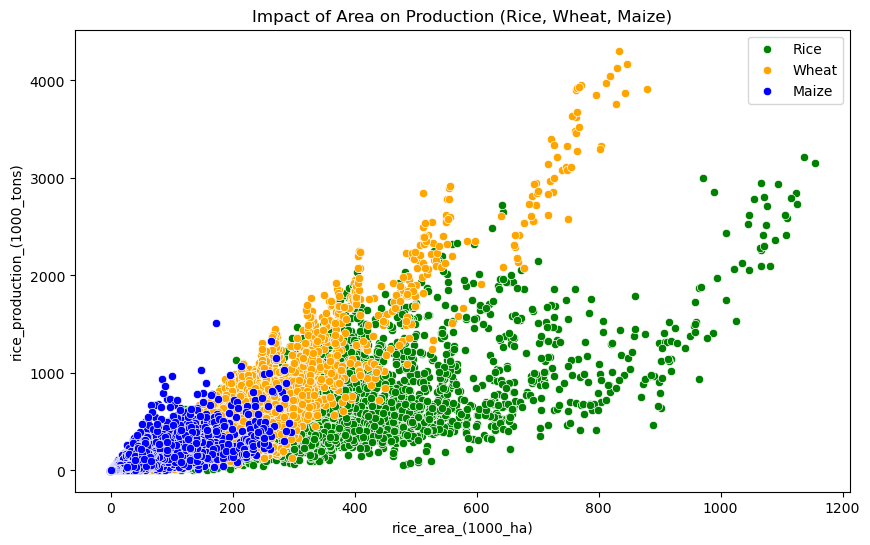

In [48]:
# 14. Impact of Area on Production (Rice, Wheat, Maize)

plt.figure(figsize=(10,6))
sns.scatterplot(x="rice_area_(1000_ha)", y="rice_production_(1000_tons)", data=df, color="green", label="Rice")
sns.scatterplot(x="wheat_area_(1000_ha)", y="wheat_production_(1000_tons)", data=df, color="orange", label="Wheat")
sns.scatterplot(x="maize_area_(1000_ha)", y="maize_production_(1000_tons)", data=df, color="blue", label="Maize")
plt.title("Impact of Area on Production (Rice, Wheat, Maize)")
plt.legend()
plt.show()

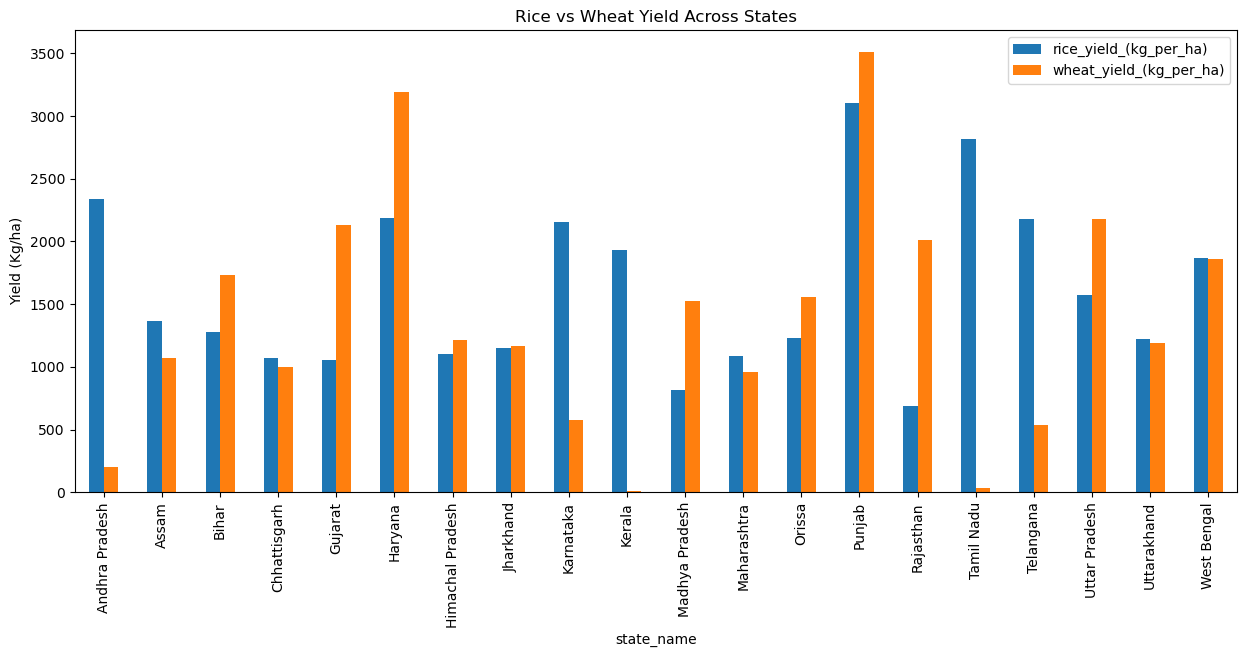

In [50]:
# 15. Rice vs Wheat Yield Across States

yield_states = df.groupby("state_name")[["rice_yield_(kg_per_ha)","wheat_yield_(kg_per_ha)"]].mean()
yield_states.plot(kind="bar", figsize=(15,6))
plt.title("Rice vs Wheat Yield Across States")
plt.ylabel("Yield (Kg/ha)")
plt.show()

In [8]:
import pandas as pd
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus

# ==== Step 1: Read CSV ====
csv_path = r"ICRISAT_District_Cleaned.csv"
agri_df = pd.read_csv(csv_path)

# ==== Step 2: MySQL connection details ====
host = "localhost"
port = "3306"
database = "agri_data"
username = "root"
password = "Papa@1712"

# ==== Step 3: URL-encode password for SQLAlchemy ====
password_encoded = quote_plus(password)
engine_string = f"mysql+mysqlconnector://{username}:{password_encoded}@{host}:{port}/{database}"
engine = create_engine(engine_string)

# ==== Step 4: Test connection ====
try:
    with engine.connect() as conn:
        conn.execute(text("SELECT 1"))
    print(f" Successfully connected to MySQL database '{database}'.")
except Exception as e:
    print(f" Connection failed: {e}")
    exit()

# ==== Step 5: Push CSV data to MySQL table ====
table_name = "agri_data"
try:
    agri_df.to_sql(table_name, engine, if_exists='replace', index=False)
    print(f" Data successfully pushed to table '{table_name}' in database '{database}'!")
except Exception as e:
    print(f" Error uploading data: {e}")

# ==== Step 6: Helper function to run SQL queries ====
def run_query(query):
    with engine.connect() as conn:
        return pd.read_sql(text(query), conn)



 Successfully connected to MySQL database 'agri_data'.
 Data successfully pushed to table 'agri_data' in database 'agri_data'!


In [10]:
# ==== 1. Year-wise Trend of Rice Production Across States (Top 3) ====

query1 = """
SELECT year, state_name, total_production
FROM (
    SELECT 
        year,
        state_name,
        SUM(`rice_production_(1000_tons)`) AS total_production,
        RANK() OVER (PARTITION BY year ORDER BY SUM(`rice_production_(1000_tons)`) DESC) AS rank_in_year
    FROM agri_data
    GROUP BY year, state_name
) ranked
WHERE rank_in_year <= 3
ORDER BY year, total_production DESC;
"""
df_rice_trend = run_query(query1)
print("=== 1. Year-wise Trend of Rice Production (Top 3 States) ===")
print(df_rice_trend)

=== 1. Year-wise Trend of Rice Production (Top 3 States) ===
     year     state_name  total_production
0    1966    West Bengal           4819.40
1    1966     Tamil Nadu           3793.00
2    1966         Orissa           3691.79
3    1967    West Bengal           4865.77
4    1967     Tamil Nadu           3848.00
..    ...            ...               ...
151  2016  Uttar Pradesh          14500.80
152  2016         Punjab          12638.00
153  2017    West Bengal          15658.94
154  2017  Uttar Pradesh          15551.39
155  2017         Punjab          13382.00

[156 rows x 3 columns]


In [11]:
# ==== 2. Top 5 Districts by Wheat Yield Increase Over the Last 5 Years ====

query2 = """
WITH last_5_years AS (
    SELECT *
    FROM agri_data
    WHERE year >= (SELECT MAX(year) - 4 FROM agri_data)
)
SELECT dist_name, state_name,
       MAX(`wheat_yield_(kg_per_ha)`) - MIN(`wheat_yield_(kg_per_ha)`) AS yield_increase
FROM last_5_years
GROUP BY dist_name, state_name
ORDER BY yield_increase DESC
LIMIT 5;
"""
df_wheat_yield = run_query(query2)
print("\n=== 2. Top 5 Districts by Wheat Yield Increase (Last 5 Years) ===")
print(df_wheat_yield)


=== 2. Top 5 Districts by Wheat Yield Increase (Last 5 Years) ===
   dist_name     state_name  yield_increase
0   Adilabad      Telangana         3696.11
1      Nadia    West Bengal         3405.97
2  Hyderabad      Telangana         3268.42
3      Thane    Maharashtra         2833.33
4     Kanpur  Uttar Pradesh         2750.47


In [12]:
# ==== 3. States with the Highest Growth in Oilseed Production (5-Year Growth Rate) ====

query3 = """
WITH oilseed_growth AS (
    SELECT state_name,
           MIN(`oilseeds_production_(1000_tons)`) AS prod_start,
           MAX(`oilseeds_production_(1000_tons)`) AS prod_end,
           MAX(year) - MIN(year) AS years_diff
    FROM agri_data
    GROUP BY state_name
)
SELECT state_name,
       (prod_end - prod_start) / years_diff AS avg_annual_growth
FROM oilseed_growth
ORDER BY avg_annual_growth DESC
LIMIT 5;
"""
df_oilseed_growth = run_query(query3)
print("\n=== 3. States with Highest Oilseed Production Growth (5-Year Rate) ===")
print(df_oilseed_growth)


=== 3. States with Highest Oilseed Production Growth (5-Year Rate) ===
       state_name  avg_annual_growth
0         Gujarat          33.606275
1  Andhra Pradesh          22.737451
2     Maharashtra          20.503922
3       Rajasthan          18.990392
4  Madhya Pradesh          16.506863


In [20]:
# ==== 4. District-wise Correlation Between Area and Production for Major Crops (Rice, Wheat, and Maize)====

query4 = """
SELECT
    dist_name,
    state_name,

    -- Rice correlation
    CASE
        WHEN COUNT(`rice_production_(1000_tons)`) > 1
             AND SQRT(COUNT(`rice_production_(1000_tons)`) * SUM(`rice_production_(1000_tons)` * `rice_production_(1000_tons)`) - POWER(SUM(`rice_production_(1000_tons)`), 2)) <> 0
             AND SQRT(COUNT(`rice_area_(1000_ha)`) * SUM(`rice_area_(1000_ha)` * `rice_area_(1000_ha)`) - POWER(SUM(`rice_area_(1000_ha)`), 2)) <> 0
        THEN
            (COUNT(`rice_production_(1000_tons)`) * SUM(`rice_production_(1000_tons)` * `rice_area_(1000_ha)`) - SUM(`rice_production_(1000_tons)`) * SUM(`rice_area_(1000_ha)`)) /
            (SQRT(COUNT(`rice_production_(1000_tons)`) * SUM(`rice_production_(1000_tons)` * `rice_production_(1000_tons)`) - POWER(SUM(`rice_production_(1000_tons)`), 2)) *
             SQRT(COUNT(`rice_area_(1000_ha)`) * SUM(`rice_area_(1000_ha)` * `rice_area_(1000_ha)`) - POWER(SUM(`rice_area_(1000_ha)`), 2)))
        ELSE NULL
    END AS rice_corr,

    -- Wheat correlation
    CASE
        WHEN COUNT(`wheat_production_(1000_tons)`) > 1
             AND SQRT(COUNT(`wheat_production_(1000_tons)`) * SUM(`wheat_production_(1000_tons)` * `wheat_production_(1000_tons)`) - POWER(SUM(`wheat_production_(1000_tons)`), 2)) <> 0
             AND SQRT(COUNT(`wheat_area_(1000_ha)`) * SUM(`wheat_area_(1000_ha)` * `wheat_area_(1000_ha)`) - POWER(SUM(`wheat_area_(1000_ha)`), 2)) <> 0
        THEN
            (COUNT(`wheat_production_(1000_tons)`) * SUM(`wheat_production_(1000_tons)` * `wheat_area_(1000_ha)`) - SUM(`wheat_production_(1000_tons)`) * SUM(`wheat_area_(1000_ha)`)) /
            (SQRT(COUNT(`wheat_production_(1000_tons)`) * SUM(`wheat_production_(1000_tons)` * `wheat_production_(1000_tons)`) - POWER(SUM(`wheat_production_(1000_tons)`), 2)) *
             SQRT(COUNT(`wheat_area_(1000_ha)`) * SUM(`wheat_area_(1000_ha)` * `wheat_area_(1000_ha)`) - POWER(SUM(`wheat_area_(1000_ha)`), 2)))
        ELSE NULL
    END AS wheat_corr,

    -- Maize correlation
    CASE
        WHEN COUNT(`maize_production_(1000_tons)`) > 1
             AND SQRT(COUNT(`maize_production_(1000_tons)`) * SUM(`maize_production_(1000_tons)` * `maize_production_(1000_tons)`) - POWER(SUM(`maize_production_(1000_tons)`), 2)) <> 0
             AND SQRT(COUNT(`maize_area_(1000_ha)`) * SUM(`maize_area_(1000_ha)` * `maize_area_(1000_ha)`) - POWER(SUM(`maize_area_(1000_ha)`), 2)) <> 0
        THEN
            (COUNT(`maize_production_(1000_tons)`) * SUM(`maize_production_(1000_tons)` * `maize_area_(1000_ha)`) - SUM(`maize_production_(1000_tons)`) * SUM(`maize_area_(1000_ha)`)) /
            (SQRT(COUNT(`maize_production_(1000_tons)`) * SUM(`maize_production_(1000_tons)` * `maize_production_(1000_tons)`) - POWER(SUM(`maize_production_(1000_tons)`), 2)) *
             SQRT(COUNT(`maize_area_(1000_ha)`) * SUM(`maize_area_(1000_ha)` * `maize_area_(1000_ha)`) - POWER(SUM(`maize_area_(1000_ha)`), 2)))
        ELSE NULL
    END AS maize_corr

FROM agri_data
WHERE (`rice_production_(1000_tons)` IS NOT NULL AND `rice_area_(1000_ha)` IS NOT NULL)
   OR (`wheat_production_(1000_tons)` IS NOT NULL AND `wheat_area_(1000_ha)` IS NOT NULL)
   OR (`maize_production_(1000_tons)` IS NOT NULL AND `maize_area_(1000_ha)` IS NOT NULL)
GROUP BY dist_name, state_name
ORDER BY state_name, dist_name;
"""

with engine.connect() as conn:
    df_corr = pd.read_sql(text(query4), conn)

print(df_corr)

         dist_name      state_name  rice_corr  wheat_corr  maize_corr
0       Ananthapur  Andhra Pradesh   0.737403    0.792199    0.958003
1         Chittoor  Andhra Pradesh   0.793966    0.908901    0.949190
2    East Godavari  Andhra Pradesh   0.646491         NaN    0.957461
3           Guntur  Andhra Pradesh   0.433883    0.676052    0.983265
4       Kadapa YSR  Andhra Pradesh   0.419919    0.913140    0.953639
..             ...             ...        ...         ...         ...
306       Midnapur     West Bengal   0.899745    0.917097    0.620967
307    Murshidabad     West Bengal   0.843655    0.926263    0.991778
308          Nadia     West Bengal   0.792203    0.829532    0.963450
309        Purulia     West Bengal   0.652963    0.928404    0.667824
310  West Dinajpur     West Bengal   0.133712    0.899681    0.984259

[311 rows x 5 columns]


In [24]:
# ==== 5. Yearly Production Growth of Cotton in Top 5 Cotton Producing States ====

import pandas as pd
from sqlalchemy import text

# Step 1: Identify top 5 cotton-producing states
query_top5 = """
SELECT state_name, SUM(`cotton_production_(1000_tons)`) AS total_production
FROM agri_data
GROUP BY state_name
ORDER BY total_production DESC
LIMIT 5;
"""
top5_states = run_query(query_top5)  # Your existing function
top5_list = top5_states['state_name'].tolist()

# Step 2: Get actual yearly production for these top 5 states
query_yearly = f"""
SELECT year, state_name, SUM(`cotton_production_(1000_tons)`) AS yearly_production
FROM agri_data
WHERE state_name IN ({', '.join(['"%s"' % s for s in top5_list])})
GROUP BY year, state_name
ORDER BY year, state_name;
"""
df_yearly = run_query(query_yearly)

# Step 3: Create a full grid of all years and all top 5 states
years = df_yearly['year'].unique()
full_grid = pd.MultiIndex.from_product([years, top5_list], names=['year', 'state_name']).to_frame(index=False)

# Step 4: Merge actual data with full grid to fill missing combinations
df_full = pd.merge(full_grid, df_yearly, on=['year', 'state_name'], how='left')
df_full['yearly_production'] = df_full['yearly_production'].fillna(0)

# Step 5: Sort for neat output
df_full = df_full.sort_values(['year', 'state_name']).reset_index(drop=True)

print(df_full.head(5)) 
print(df_full.tail(5)) 


   year   state_name  yearly_production
0  1966      Gujarat              252.0
1  1966      Haryana               54.3
2  1966  Maharashtra              197.0
3  1966       Punjab              131.6
4  1966    Telangana                8.6
     year   state_name  yearly_production
255  2017      Gujarat            1820.28
256  2017      Haryana             292.68
257  2017  Maharashtra            1096.83
258  2017       Punjab             230.94
259  2017    Telangana             935.19


In [25]:
# =====6.Districts with the Highest Groundnut Production in 2017
query6 = """
SELECT dist_name, state_name, `groundnut_production_(1000_tons)` AS groundnut_production
FROM agri_data
WHERE year = 2017
ORDER BY groundnut_production DESC
LIMIT 5;
"""
with engine.connect() as conn:
    df_groundnut = pd.read_sql(text(query6), conn)

print(df_groundnut)

    dist_name      state_name  groundnut_production
0    Jamnagar         Gujarat                977.65
1    Junagadh         Gujarat                945.49
2      Rajkot         Gujarat                873.87
3     Bikaner       Rajasthan                514.09
4  Ananthapur  Andhra Pradesh                454.94


In [28]:
# ====== 7. Annual Average Maize Yield Across All States ======

query7 = """
SELECT year, AVG(`maize_yield_(kg_per_ha)`) AS avg_maize_yield
FROM agri_data
GROUP BY year
ORDER BY year;
"""

with engine.connect() as conn:
    df_maize_yield = pd.read_sql(text(query7), conn)

print(df_maize_yield)

    year  avg_maize_yield
0   1966       734.266355
1   1967       869.540323
2   1968       709.261774
3   1969       781.476645
4   1970      1094.176206
5   1971       848.642862
6   1972       895.126141
7   1973       886.839614
8   1974       852.936592
9   1975      1026.008875
10  1976       966.653537
11  1977       946.525113
12  1978       964.877170
13  1979       984.162058
14  1980      1067.085402
15  1981      1119.513826
16  1982      1189.239904
17  1983      1314.558264
18  1984      1226.566817
19  1985      1057.788746
20  1986      1078.989936
21  1987       945.443955
22  1988      1145.877492
23  1989      1324.732186
24  1990      1235.363452
25  1991      1157.018419
26  1992      1450.823000
27  1993      1345.807323
28  1994      1211.294774
29  1995      1344.002336
30  1996      1443.180098
31  1997      1409.269325
32  1998      1419.082219
33  1999      1516.950772
34  2000      1556.488296
35  2001      1758.419775
36  2002      1384.691961
37  2003    

In [29]:
# ====== 8. Total Area Cultivated for Oilseeds in Each State ======

query8 = """
SELECT state_name, SUM(`oilseeds_area_(1000_ha)`) AS total_oilseeds_area
FROM agri_data
GROUP BY state_name
ORDER BY total_oilseeds_area DESC;
"""

with engine.connect() as conn:
    df_oilseed_area = pd.read_sql(text(query8), conn)

print(df_oilseed_area)

          state_name  total_oilseeds_area
0     Madhya Pradesh            189945.92
1          Rajasthan            142433.47
2        Maharashtra            134069.16
3            Gujarat            130724.71
4          Karnataka             92527.23
5     Andhra Pradesh             87223.49
6         Tamil Nadu             56225.64
7      Uttar Pradesh             43047.07
8             Orissa             39682.05
9          Telangana             35293.43
10            Kerala             34348.94
11           Haryana             21465.54
12       West Bengal             20300.76
13      Chhattisgarh             17267.08
14             Assam             14176.64
15            Punjab              8697.93
16             Bihar              5536.29
17         Jharkhand              2826.29
18       Uttarakhand               993.53
19  Himachal Pradesh               799.25


In [30]:
# ====== 9. Districts with the Highest Rice Yield ======

query9 = """
SELECT dist_name, state_name, MAX(`rice_yield_(kg_per_ha)`) AS max_rice_yield
FROM agri_data
GROUP BY dist_name, state_name
ORDER BY max_rice_yield DESC
LIMIT 5;
"""

with engine.connect() as conn:
    df_highest_rice_yield = pd.read_sql(text(query9), conn)

print(df_highest_rice_yield)

      dist_name      state_name  max_rice_yield
0  Thirunelveli      Tamil Nadu         5653.83
1       Saharsa           Bihar         5542.32
2   Kanyakumari      Tamil Nadu         5421.78
3          Rewa  Madhya Pradesh         5159.93
4         Salem      Tamil Nadu         5129.68


In [31]:
# ====== 10. Compare the Production of Wheat and Rice for the Top 5 States Over 10 Years ======
query10 = """
WITH top_states AS (
    SELECT state_name, 
           SUM(`wheat_production_(1000_tons)` + `rice_production_(1000_tons)`) AS total_production
    FROM agri_data
    GROUP BY state_name
    ORDER BY total_production DESC
    LIMIT 5
)
SELECT
    year,
    state_name,
    SUM(`wheat_production_(1000_tons)`) AS total_wheat,
    SUM(`rice_production_(1000_tons)`) AS total_rice
FROM agri_data
WHERE state_name IN (SELECT state_name FROM top_states)
GROUP BY year, state_name
ORDER BY year, state_name;
"""

with engine.connect() as conn:
    df_production_wheatandrice = pd.read_sql(text(query10), conn)

print(df_production_wheatandrice)

     year      state_name  total_wheat  total_rice
0    1966         Haryana      1104.00      226.20
1    1966  Madhya Pradesh      1001.40      374.20
2    1966          Punjab      2519.40      338.00
3    1966   Uttar Pradesh      3943.60     2473.50
4    1966     West Bengal        45.55     4819.40
..    ...             ...          ...         ...
255  2017         Haryana     12263.00     4880.00
256  2017  Madhya Pradesh     20019.95     4899.06
257  2017          Punjab     17830.00    13382.00
258  2017   Uttar Pradesh     35798.60    15551.39
259  2017     West Bengal       359.13    15658.94

[260 rows x 4 columns]
